<a href="https://colab.research.google.com/github/yumna-prog/Customer-Churn-Prediction/blob/main/CustomerChurnPreduiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the data
- Predict behavior to retain customers.
- 7043 data instance
- Customers who left within the last month – Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
-Demographic info about customers – gender, age range, and if they have partners and dependents

#Understand the problem
- Classification


Connect to the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dependecies


In [16]:
# 1. Data frame
import pandas as pd
# 2. Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Understand dataset

In [3]:
#Data loading and setup
Telecommuniction_df=pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

In [4]:
#View the data
Telecommuniction_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#EDA

In [5]:
#Check dataset structure and types
Telecommuniction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* The initial dataset doesnt show any missing values
* The data type of TotalCherges is object, which should be converted to float

##Handle incorrect datatypes

In [6]:
#Handle the incorrect data type

#1. Convert the column into numeric type (any value that cannot be converted turns into "Nan")
Telecommuniction_df['TotalCharges'] = pd.to_numeric(Telecommuniction_df['TotalCharges'], errors='coerce')
#2. Convert the column into float type
Telecommuniction_df['TotalCharges'] = Telecommuniction_df['TotalCharges'].astype(float)

In [7]:
#Check for any missing values
Telecommuniction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No its observed that TotalChanges column has 11 missing values after the data type convertion

##Handle missing values

In [8]:
# 1) Confirm TotalCharges is count missing values
missing_count = Telecommuniction_df['TotalCharges'].isna().sum()
total = len(Telecommuniction_df)
print(f"Missing TotalCharges: {missing_count} / {total} ({missing_count/total*100:.6f}%)")

Missing TotalCharges: 11 / 7043 (0.156183%)


In [9]:
#Observe the missing values(cross check with other features)
missing_rows = Telecommuniction_df[Telecommuniction_df['TotalCharges'].isna()]
print(missing_rows[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN
6754  2775-SEFEE       0           61.90           NaN


In [10]:
#Check if tenure==0 for these rows
print(missing_rows['tenure'].value_counts(dropna=False))

tenure
0    11
Name: count, dtype: int64


It is observed that all the records which have missing values for has 0 aas the corresponding tenure value

tenure = length of time a customer has been a subscriber to a service

*Based on the telecommunication domain customers with tenure=0, will not be having cheges to be paid*

Technique of handling missing values - Imputation

Why imputation -
1. The approach taken to perform imputation is through domain knowledge as explained above, this ensures that a realistic , logical value instead of an arbitrary mean/median.
2. Imputation preserves the original distribution.
3. Reduces noise caused by NaNs and prevents the introduction of spurious patterns

Why not deletion-
1. Dropping rows loses actual customer records. Even 11 rows can represent a meaningful group.
2. Changes the dataset’s distribution and can bias results.


In [11]:
#Using a missing indicator to preserve in information about which rows originally had missing values
Telecommuniction_df['TotalCharges_missing_flag'] =Telecommuniction_df['TotalCharges'].isna().astype(int)

#According to the above oberservation, New customers with tenure = 0 naturally should have TotalCharges = 0
Telecommuniction_df.loc[(Telecommuniction_df['TotalCharges'].isna()) & (Telecommuniction_df['tenure'] == 0), 'TotalCharges'] = 0


In [12]:
#If there are any remaining NaNs
remaining_nans = Telecommuniction_df['TotalCharges'].isna().sum()
print("Remaining NaNs after conditional imputation:", remaining_nans)

Remaining NaNs after conditional imputation: 0


##Handle duplicate values

In [13]:
# Check duplicate values in rows
print(Telecommuniction_df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


In [14]:
# Check duplicate values in columns
print(Telecommuniction_df.duplicated(subset=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']))

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


In [15]:
# Prints the duplicate rows except first
duplicate = Telecommuniction_df[Telecommuniction_df.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_missing_flag


No duplicates to be found

## Handle Outliers

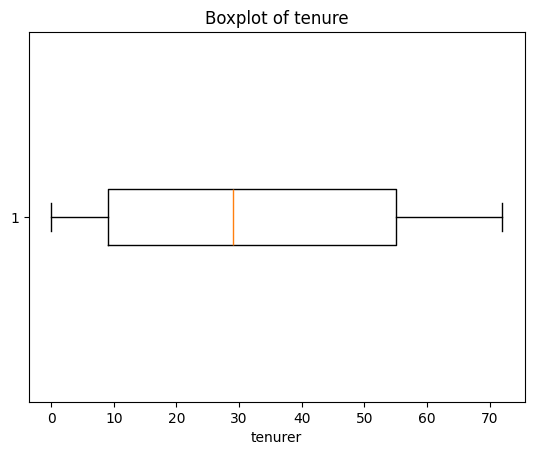

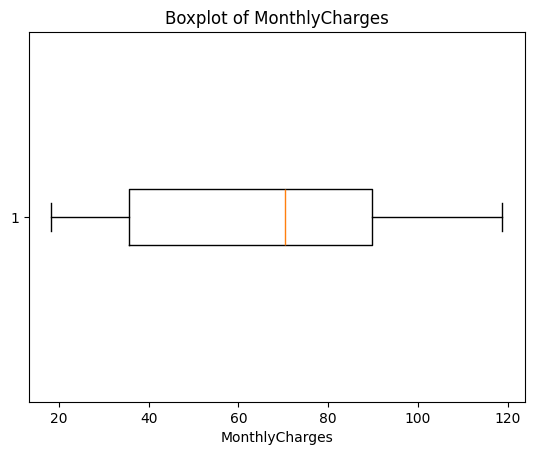

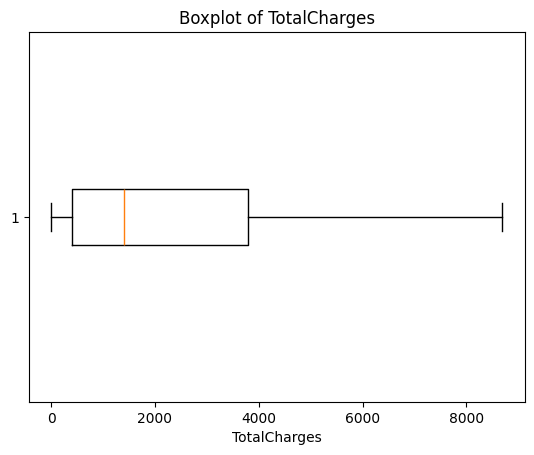

In [17]:
#Checking outliers of numeric columns only
#tenure
plt.boxplot(Telecommuniction_df['tenure'], vert=False)
plt.title("Boxplot of tenure")
plt.xlabel('tenurer')
plt.show()

#MonthlyCharges
plt.boxplot(Telecommuniction_df['MonthlyCharges'], vert=False)
plt.title("Boxplot of MonthlyCharges")
plt.xlabel('MonthlyCharges')
plt.show()

#TotalCharges
plt.boxplot(Telecommuniction_df['TotalCharges'], vert=False)
plt.title("Boxplot of TotalCharges")
plt.xlabel('TotalCharges')
plt.show()


In [18]:
#IQR Method
# Extracting the numeric features
data = Telecommuniction_df.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], axis = 1)

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print(outliers_iqr.sum())


tenure                        0
MonthlyCharges                0
TotalCharges                  0
TotalCharges_missing_flag    11
dtype: int64
